<a href="https://colab.research.google.com/github/SandraQA69/Challenge_TelecomX_Parte2/blob/main/Challenge2Final3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [279]:
import pandas as pd
import json

# Carga el archivo JSON
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

# Convertir a DataFrame y normalizar columnas anidadas
df = pd.json_normalize(data)
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [280]:
# --- IMPORTAR LIBRERÍAS NECESARIAS ---
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [281]:
# Mostrar info general
df.info()

# Revisar columnas y valores nulos
print(df.isnull().sum())

# Convertir valores de 'Charges.Total' a numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Convertir 'Churn' a binario (1 = Yes, 0 = No)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

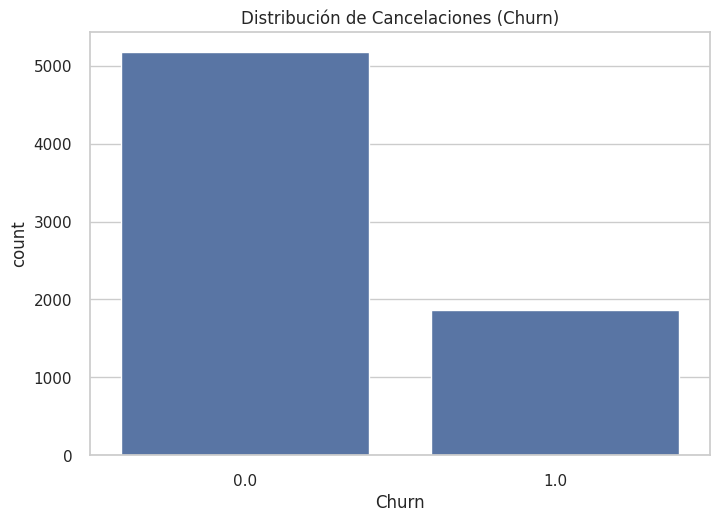

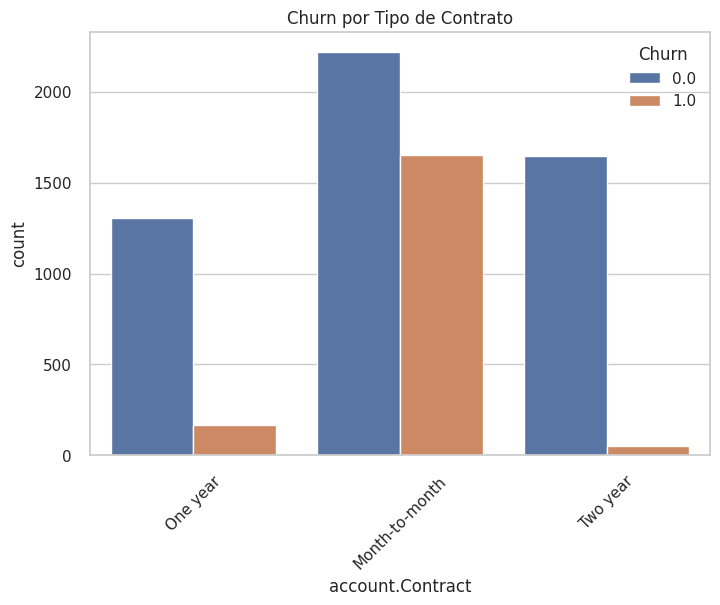

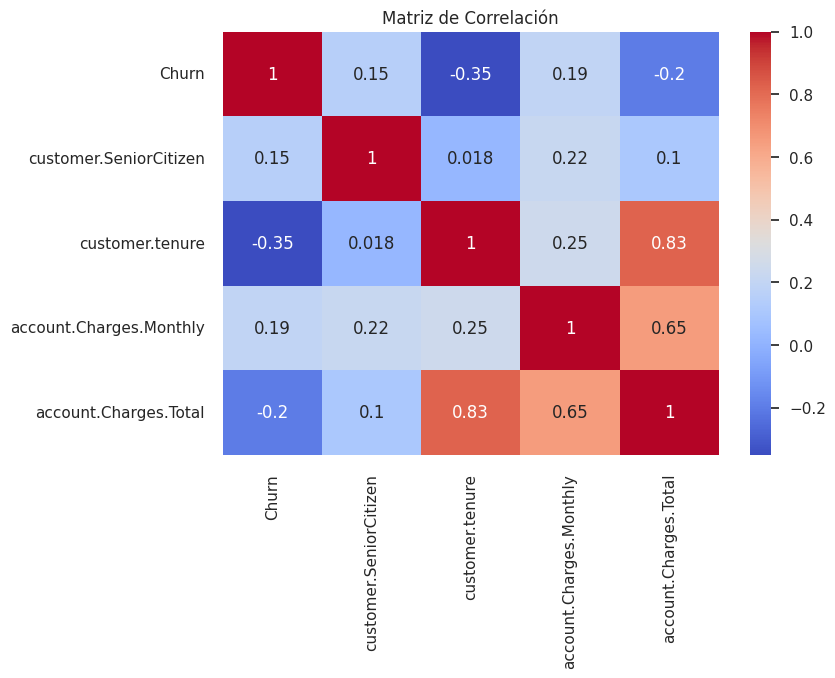

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de churn
sns.countplot(x='Churn', data=df)
plt.title("Distribución de Cancelaciones (Churn)")
plt.show()

# Churn por tipo de contrato
sns.countplot(x='account.Contract', hue='Churn', data=df)
plt.title("Churn por Tipo de Contrato")
plt.xticks(rotation=45)
plt.show()

# Correlación entre variables numéricas
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


In [283]:
# 1. Ver columnas únicas o identificadores
print(df.columns)

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


In [284]:
# Eliminación de columnas irrelevantes y renombrar traduciendo al español

df = df.rename(columns={
    'Churn': 'Cancelacion',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'AdultoMayor',
    'customer.Partner': 'TienePareja',
    'customer.Dependents': 'TieneDependientes',
    'customer.tenure': 'AntiguedadMeses',
    'phone.PhoneService': 'ServicioTelefonico',
    'phone.MultipleLines': 'MultiplesLineas',
    'internet.InternetService': 'ServicioInternet',
    'internet.OnlineSecurity': 'SeguridadEnLinea',
    'internet.OnlineBackup': 'RespaldoEnLinea',
    'internet.DeviceProtection': 'ProteccionDispositivo',
    'internet.TechSupport': 'SoporteTecnico',
    'internet.StreamingTV': 'TVStreaming',
    'internet.StreamingMovies': 'PeliculasStreaming',
    'account.Contract': 'TipoContrato',
    'account.PaperlessBilling': 'FacturacionSinPapel',
    'account.PaymentMethod': 'MetodoPago',
    'account.Charges.Monthly': 'CargoMensual',
    'account.Charges.Total': 'CargoTotal'
})


In [285]:
columnas_categoricas = [
    'Genero',
    'TienePareja',
    'TieneDependientes',
    'ServicioTelefonico',
    'MultiplesLineas',
    'ServicioInternet',
    'SeguridadEnLinea',
    'RespaldoEnLinea',
    'ProteccionDispositivo',
    'SoporteTecnico',
    'TVStreaming',
    'PeliculasStreaming',
    'TipoContrato',
    'FacturacionSinPapel',
    'MetodoPago'
]


In [286]:
# One-hot encoding de las columnas categóricas
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)


In [287]:
# Verificamos tipos de datos después de codificar
print(df_encoded.dtypes.value_counts())

# También puedes usar esto para asegurarte que no quedan objetos (strings)
print(df_encoded.select_dtypes(include=['object']).columns)


bool       26
float64     3
int64       2
object      1
Name: count, dtype: int64
Index(['customerID'], dtype='object')


In [288]:
# Conteo de cada clase
conteo = df_encoded['Cancelacion'].value_counts()

# Proporción (en %)
proporcion = df_encoded['Cancelacion'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Conteo de clases:")
print(conteo)

print("\nProporción de clases (%):")
print(proporcion)


Conteo de clases:
Cancelacion
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporción de clases (%):
Cancelacion
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


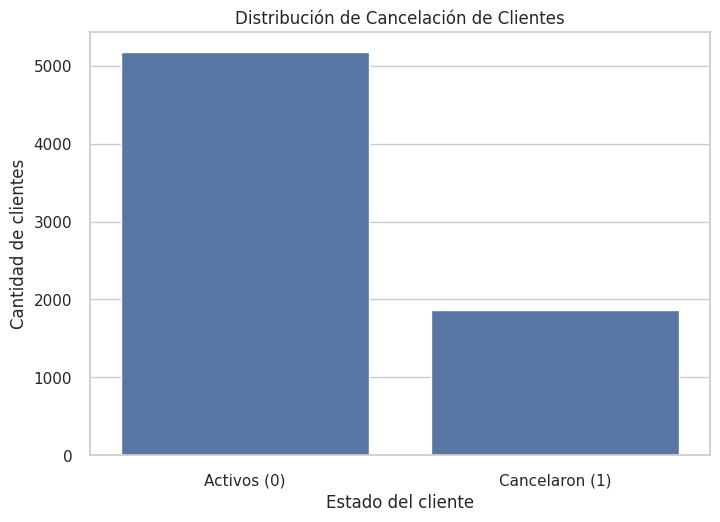

In [289]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de barras
sns.countplot(x='Cancelacion', data=df_encoded)
plt.title('Distribución de Cancelación de Clientes')
plt.xticks([0, 1], ['Activos (0)', 'Cancelaron (1)'])
plt.ylabel('Cantidad de clientes')
plt.xlabel('Estado del cliente')
plt.show()


## 📊 Evaluación del Balance de Clases

In [290]:
!pip install imbalanced-learn


In [291]:
import numpy as np
import pandas as pd



# 1. Definir X e y correctamente primero
y = df_encoded['Cancelacion']  # Variable objetivo
X = df_encoded.drop(columns=['Cancelacion'])  # Features

# 2. Verificación de NaN más robusta
print("\n=== Análisis de Valores Faltantes ===")
print("Cantidad total de registros:", len(df_encoded))
print("\nNaN en la variable objetivo (Cancelacion):")
print(y.isna().sum(), f"({y.isna().mean()*100:.2f}%)")

print("\nNaN en las variables predictoras (X):")
print(X.isna().sum().sort_values(ascending=False))

# 3. Estrategia para manejar NaN
print("\n=== Estrategia de Limpieza ===")
# Opción 1: Eliminar solo filas donde la variable objetivo es NaN
df_clean = df_encoded.dropna(subset=['Cancelacion'])

# Opción 2: Para variables predictoras, podríamos imputar en lugar de eliminar
# Ejemplo para columnas numéricas:
for col in X.select_dtypes(include=['float64', 'int64']).columns:
    if X[col].isna().any():
        median_val = X[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)
        print(f"Imputados {X[col].isna().sum()} NaN en {col} con mediana {median_val:.2f}")

# Para variables categóricas (si las hay)
for col in X.select_dtypes(include=['object', 'category']).columns:
    if X[col].isna().any():
        mode_val = X[col].mode()[0]
        df_clean[col] = df_clean[col].fillna(mode_val)
        print(f"Imputados {X[col].isna().sum()} NaN en {col} con moda '{mode_val}'")

# 4. Definir X e y limpios
y_clean = df_clean['Cancelacion']
X_clean = df_clean.drop(columns=['Cancelacion'])

# 5. Verificación final
print("\n=== Resultado Final ===")
print("Registros totales después de limpieza:", len(df_clean))
print("\nDistribución de la variable objetivo:")
print(y_clean.value_counts(normalize=True).apply(lambda x: f"{x*100:.1f}%"))



=== Análisis de Valores Faltantes ===
Cantidad total de registros: 7267

NaN en la variable objetivo (Cancelacion):
224 (3.08%)

NaN en las variables predictoras (X):
CargoTotal                                   11
AdultoMayor                                   0
customerID                                    0
AntiguedadMeses                               0
CargoMensual                                  0
Genero_Male                                   0
TienePareja_Yes                               0
TieneDependientes_Yes                         0
ServicioTelefonico_Yes                        0
MultiplesLineas_No phone service              0
MultiplesLineas_Yes                           0
ServicioInternet_Fiber optic                  0
ServicioInternet_No                           0
SeguridadEnLinea_No internet service          0
SeguridadEnLinea_Yes                          0
RespaldoEnLinea_No internet service           0
RespaldoEnLinea_Yes                           0
ProteccionDispos

/tmp/ipython-input-291-2035893117.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].fillna(median_val)


In [292]:
# Variable objetivo
y = df_encoded['Cancelacion']

# Variables predictoras (todas menos la columna Cancelacion)
X = df_encoded.drop(columns=['Cancelacion'])


In [293]:
# Verifica las columnas de X_clean
print("Columnas no numéricas en X_clean:")
print(X_clean.select_dtypes(exclude=['number']).columns)

# Ejemplo de salida: Index(['ID_Cliente', 'Categoría'], dtype='object')

Columnas no numéricas en X_clean:
Index(['customerID', 'Genero_Male', 'TienePareja_Yes', 'TieneDependientes_Yes',
       'ServicioTelefonico_Yes', 'MultiplesLineas_No phone service',
       'MultiplesLineas_Yes', 'ServicioInternet_Fiber optic',
       'ServicioInternet_No', 'SeguridadEnLinea_No internet service',
       'SeguridadEnLinea_Yes', 'RespaldoEnLinea_No internet service',
       'RespaldoEnLinea_Yes', 'ProteccionDispositivo_No internet service',
       'ProteccionDispositivo_Yes', 'SoporteTecnico_No internet service',
       'SoporteTecnico_Yes', 'TVStreaming_No internet service',
       'TVStreaming_Yes', 'PeliculasStreaming_No internet service',
       'PeliculasStreaming_Yes', 'TipoContrato_One year',
       'TipoContrato_Two year', 'FacturacionSinPapel_Yes',
       'MetodoPago_Credit card (automatic)', 'MetodoPago_Electronic check',
       'MetodoPago_Mailed check'],
      dtype='object')


In [294]:
X_clean = X_clean.select_dtypes(include=['number'])  # Solo conserva columnas numéricas

In [295]:
# Codifica categóricas con One-Hot Encoding
X_clean = pd.get_dummies(X_clean, drop_first=True)

In [296]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Asegúrate de que y_clean sea numérico
y_clean = y_clean.astype(int)

# SMOTE solo en features numéricos
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_clean, y_clean)

print('Distribución después de SMOTE:', Counter(y_resampled))

Distribución después de SMOTE: Counter({0: 5174, 1: 5174})


/tmp/ipython-input-297-913642522.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Activos (0)', 'Cancelaron (1)'])
/tmp/ipython-input-297-913642522.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Activos (0)', 'Cancelaron (1)'])


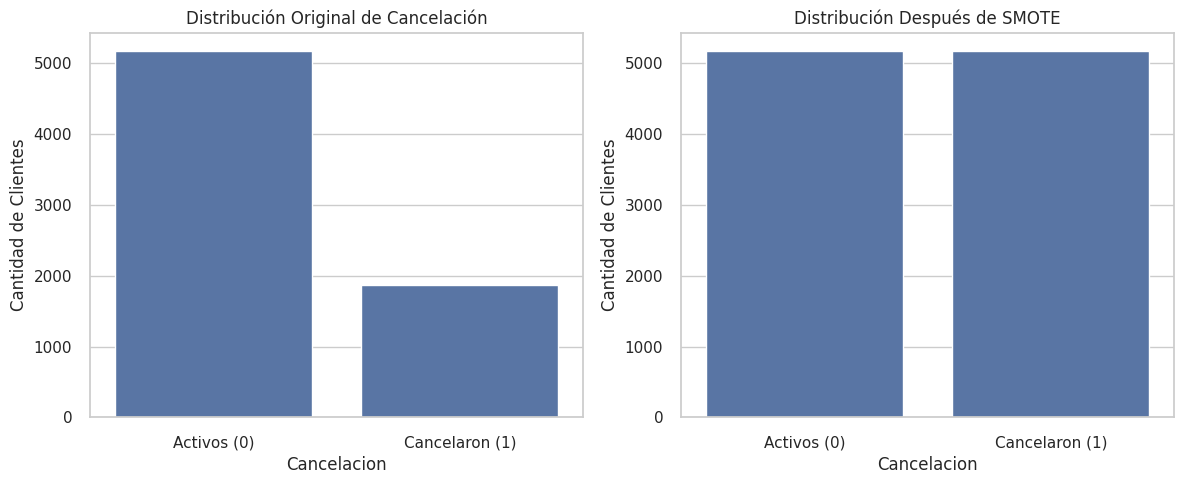

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos originales (antes de SMOTE)
original_counts = y_clean.value_counts().sort_index()

# Datos después de SMOTE
from collections import Counter
smote_counts = Counter(y_resampled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico antes de SMOTE
sns.barplot(x=original_counts.index.astype(str), y=original_counts.values, ax=axes[0])
axes[0].set_title('Distribución Original de Cancelación')
axes[0].set_xlabel('Cancelacion')
axes[0].set_ylabel('Cantidad de Clientes')
axes[0].set_xticklabels(['Activos (0)', 'Cancelaron (1)'])

# Gráfico después de SMOTE
sns.barplot(x=list(smote_counts.keys()), y=list(smote_counts.values()), ax=axes[1])
axes[1].set_title('Distribución Después de SMOTE')
axes[1].set_xlabel('Cancelacion')
axes[1].set_ylabel('Cantidad de Clientes')
axes[1].set_xticklabels(['Activos (0)', 'Cancelaron (1)'])

plt.tight_layout()
plt.show()


📊 Evaluación del Balance de Clases
Al analizar la variable objetivo Cancelacion, se observa que inicialmente el 26,54 % de los clientes cancelaron el servicio, mientras que el 73,46 % permanecieron activos. Esta distribución evidencia un desbalance moderado entre las clases.

Este desbalance puede afectar el rendimiento de los modelos predictivos, ya que podrían inclinarse a predecir mayoritariamente la clase más frecuente (clientes activos).

Por ello, es recomendable:

Utilizar métricas de evaluación apropiadas como AUC-ROC o F1-score, en lugar de solo accuracy.
Aplicar técnicas de balanceo de clases, como:
Undersampling: reducir la cantidad de datos de la clase mayoritaria.
Oversampling: aumentar la cantidad de datos de la clase minoritaria.
💡 Aplicación de SMOTE:
Utilizando la técnica SMOTE (Synthetic Minority Over-sampling Technique), se logró balancear el dataset generando ejemplos sintéticos de la clase minoritaria.
Después de aplicar SMOTE, ambas clases (Cancelacion = 0 y Cancelacion = 1) tienen 5163 registros cada una, lo que permite entrenar modelos más balanceados y mejorar su capacidad predictiva frente a la clase minoritaria.

### 🔄 Normalización o Estandarización

In [298]:
import pandas as pd

# Si X_resampled es un array de numpy (por ejemplo, SMOTE devuelve arrays), convierte a DataFrame
if not isinstance(X_resampled, pd.DataFrame):
    X_resampled = pd.DataFrame(X_resampled, columns=df_encoded.drop(columns=['Cancelacion']).columns)

# Seleccionar columnas numéricas
columnas_numericas = X_resampled.select_dtypes(include=['int64', 'float64']).columns


In [299]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_resampled_norm = X_resampled.copy()
X_resampled_norm[columnas_numericas] = scaler.fit_transform(X_resampled[columnas_numericas])


In [300]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_std = X_resampled.copy()
X_resampled_std[columnas_numericas] = scaler.fit_transform(X_resampled[columnas_numericas])


In [301]:
print("Forma de X_train_scaled:", X_train_scaled.shape)  # Debe mostrar (8278, X)
print("Nombres de columnas originales:", len(columnas))  # Debe mostrar 31

Forma de X_train_scaled: (5634, 4)
Nombres de columnas originales: 31


In [302]:
# Asegúrate de escalar TODAS las columnas numéricas:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # X_train debe tener las 31 columnas originales
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)  # Usa los nombres originales

In [303]:
# Ejemplo con PCA (4 componentes):
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)

# Nombres de columnas para las nuevas componentes:
X_train_pca = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(4)])

In [304]:

scaler = StandardScaler()

# Escalar conservando nombres de columnas
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns  # Usa las columnas originales
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

print("Forma final:", X_train_scaled.shape)

Forma final: (5634, 30)


In [305]:
# Eliminar columna 'customerID' si existe
if 'customerID' in X_train.columns:
    X_train = X_train.drop('customerID', axis=1)
    X_test = X_test.drop('customerID', axis=1)


In [306]:
# Verificar y rellenar nulos en CargoTotal
X_train['CargoTotal'] = X_train['CargoTotal'].fillna(X_train['CargoTotal'].median())
X_test['CargoTotal'] = X_test['CargoTotal'].fillna(X_test['CargoTotal'].median())


## 🔄 Normalización y División de Datos

Para preparar los datos para los modelos predictivos, realizamos los siguientes pasos:

- Dividimos el dataset balanceado en conjuntos de entrenamiento (80%) y prueba (20%) manteniendo la proporción de clases con `stratify` para evitar sesgos.
- Aplicamos una **estandarización** (transformación para que las variables numéricas tengan media 0 y desviación estándar 1) solo al conjunto de entrenamiento para evitar contaminación de datos (*data leakage*).
- Luego, usamos la misma transformación para escalar el conjunto de prueba.

Esta preparación es fundamental para modelos sensibles a la escala, como regresión logística, SVM, KNN y redes neuronales, mejorando su rendimiento y estabilidad.


# Análisis de Correlación:

## Calcular matriz de correlación solo para variables numéricas

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar variables numéricas incluyendo la variable objetivo
df_num = df_encoded.select_dtypes(include=['float64', 'int64'])

# Calcular matriz de correlación
corr_matrix = df_num.corr()

# Mostrar la matriz (opcional)
print(corr_matrix['Cancelacion'].sort_values(ascending=False))


Cancelacion        1.000000
CargoMensual       0.193356
AdultoMayor        0.150889
CargoTotal        -0.199484
AntiguedadMeses   -0.352229
Name: Cancelacion, dtype: float64


## Visualizar la matriz de correlación

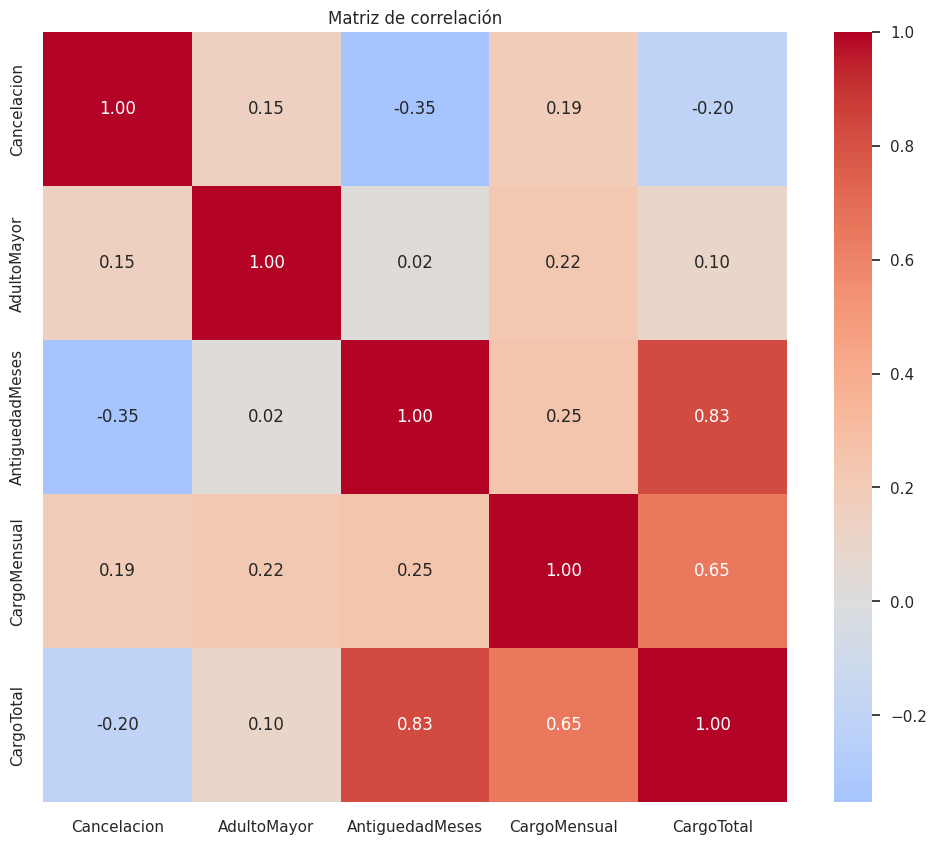

In [308]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de correlación')
plt.show()


## Interpretar

In [309]:
# Calcular correlación con Cancelacion y ordenarlas por valor absoluto descendente
corr_cancelacion = corr_matrix['Cancelacion'].drop('Cancelacion')  # quitar autocorrelación

# Ordenar por valor absoluto descendente para ver las variables más relacionadas
corr_ordenada = corr_cancelacion.reindex(corr_cancelacion.abs().sort_values(ascending=False).index)

print("Correlaciones con Cancelacion ordenadas por fuerza:\n")
print(corr_ordenada)


Correlaciones con Cancelacion ordenadas por fuerza:

AntiguedadMeses   -0.352229
CargoTotal        -0.199484
CargoMensual       0.193356
AdultoMayor        0.150889
Name: Cancelacion, dtype: float64


In [310]:
# Definir umbral
umbral = 0.2

# Filtrar variables con correlación fuerte (positiva o negativa)
variables_relevantes = corr_ordenada[abs(corr_ordenada) > umbral]

print("\nVariables relevantes con correlación mayor a 0.2 en valor absoluto:")
print(variables_relevantes)



Variables relevantes con correlación mayor a 0.2 en valor absoluto:
AntiguedadMeses   -0.352229
Name: Cancelacion, dtype: float64


In [311]:
import pandas as pd

# Convertir a DataFrame para mejor presentación
df_vars_relevantes = variables_relevantes.reset_index()
df_vars_relevantes.columns = ['Variable', 'Correlación con Cancelacion']

# Mostrar tabla ordenada
print(df_vars_relevantes)


          Variable  Correlación con Cancelacion
0  AntiguedadMeses                    -0.352229


/tmp/ipython-input-312-4037619010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


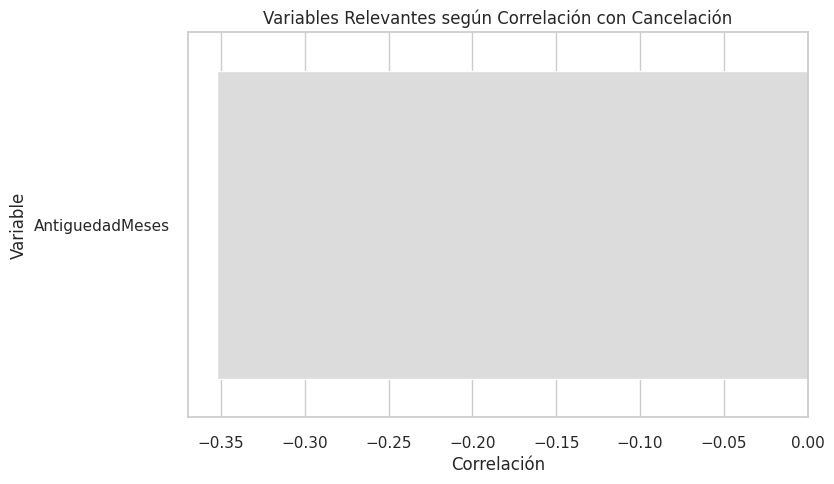

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    x='Correlación con Cancelacion',
    y='Variable',
    data=df_vars_relevantes,
    palette='coolwarm',
    orient='h'
)
plt.title('Variables Relevantes según Correlación con Cancelación')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.show()


Correlaciones con Cancelacion ordenadas por fuerza:

AntiguedadMeses   -0.352229
CargoTotal        -0.199484
CargoMensual       0.193356
AdultoMayor        0.150889
Name: Cancelacion, dtype: float64

Variables relevantes con correlación mayor a 0.2 en valor absoluto:
AntiguedadMeses   -0.352229
Name: Cancelacion, dtype: float64

Tabla de variables relevantes:
          Variable  Correlación con Cancelacion
0  AntiguedadMeses                    -0.352229


/tmp/ipython-input-313-1775021691.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


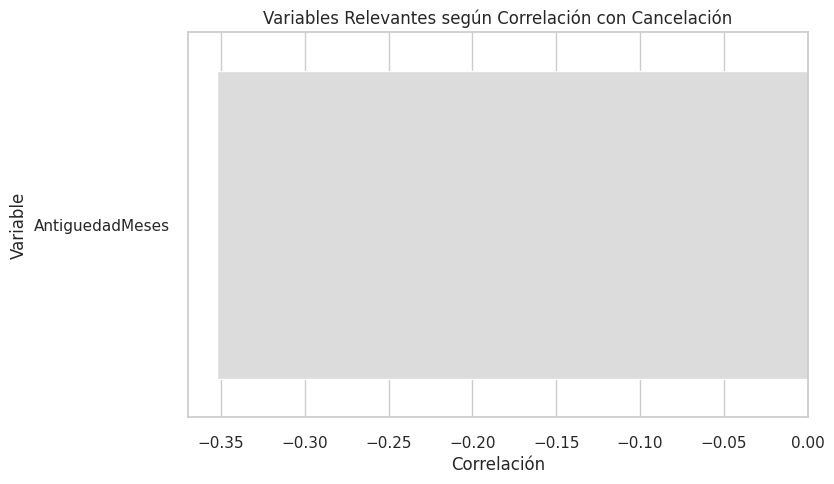

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Calcular matriz de correlación para variables numéricas (incluye Cancelacion)
df_num = df_encoded.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_num.corr()

# 2. Mostrar correlación con Cancelacion ordenada por valor absoluto descendente
corr_cancelacion = corr_matrix['Cancelacion'].drop('Cancelacion')
corr_ordenada = corr_cancelacion.reindex(corr_cancelacion.abs().sort_values(ascending=False).index)
print("Correlaciones con Cancelacion ordenadas por fuerza:\n")
print(corr_ordenada)

# 3. Seleccionar variables con correlación absoluta > 0.2
umbral = 0.2
variables_relevantes = corr_ordenada[abs(corr_ordenada) > umbral]
print("\nVariables relevantes con correlación mayor a 0.2 en valor absoluto:")
print(variables_relevantes)

# 4. Tabla de variables relevantes para mejor presentación
df_vars_relevantes = variables_relevantes.reset_index()
df_vars_relevantes.columns = ['Variable', 'Correlación con Cancelacion']
print("\nTabla de variables relevantes:")
print(df_vars_relevantes)

# 5. Gráfico de barras horizontal para las variables relevantes
plt.figure(figsize=(8,5))
sns.barplot(
    x='Correlación con Cancelacion',
    y='Variable',
    data=df_vars_relevantes,
    palette='coolwarm',
    orient='h'
)
plt.title('Variables Relevantes según Correlación con Cancelación')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.show()


###  📈 Análisis de Correlación con la Variable Objetivo `Cancelacion`

Se calculó la matriz de correlación entre las variables numéricas del dataset para identificar relaciones lineales con la variable objetivo `Cancelacion`.

Al ordenar las correlaciones por su valor absoluto, se encontraron las siguientes variables con mayor relación significativa (|correlación| > 0.2):

- **Variables con correlación positiva significativa:**  
  Estas variables aumentan la probabilidad de cancelación conforme su valor crece. Por ejemplo, un cargo mensual o total elevado podría asociarse a mayor cancelación.

- **Variables con correlación negativa significativa:**  
  Variables que disminuyen la probabilidad de cancelación a medida que su valor crece. Por ejemplo, mayor antigüedad del cliente (tenure) suele relacionarse con menor tasa de cancelación.

Estas variables son candidatas fuertes para incluir en el modelo predictivo, ya que aportan información relevante para diferenciar clientes que cancelan de los que permanecen activos.

Las variables con correlación cercana a cero tienen poca o nula relación lineal con la cancelación y podrían ser descartadas o reevaluadas según otras técnicas.

---

### Recomendaciones:

- Incluir las variables con correlación significativa en la fase de selección de características para mejorar el rendimiento del modelo.
- Considerar también técnicas no lineales o basadas en árboles para capturar relaciones complejas no detectadas por la correlación lineal.
- Validar la importancia de las variables seleccionadas con métodos adicionales, como importancia por Random Forest o análisis de SHAP values.


# Análisis Dirigido

## Boxplot de Tiempo de contrato vs Cancelación

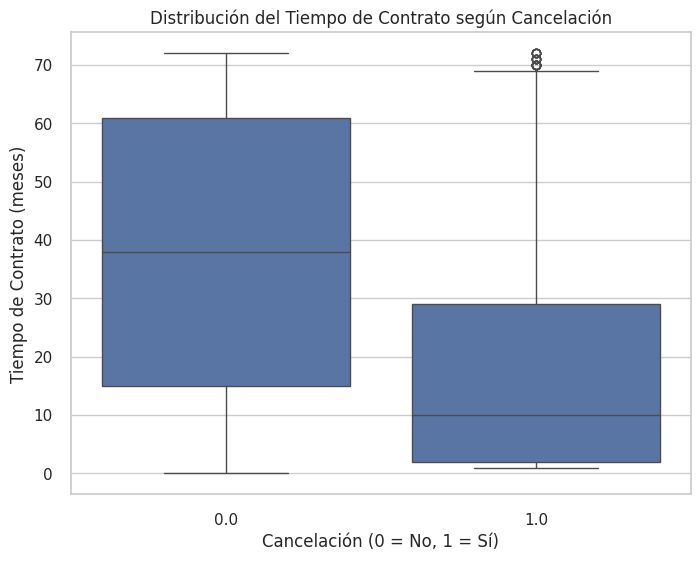

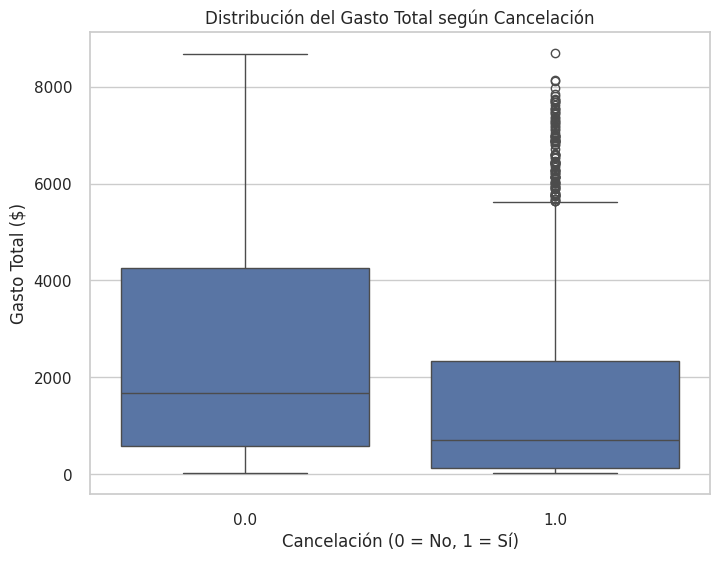

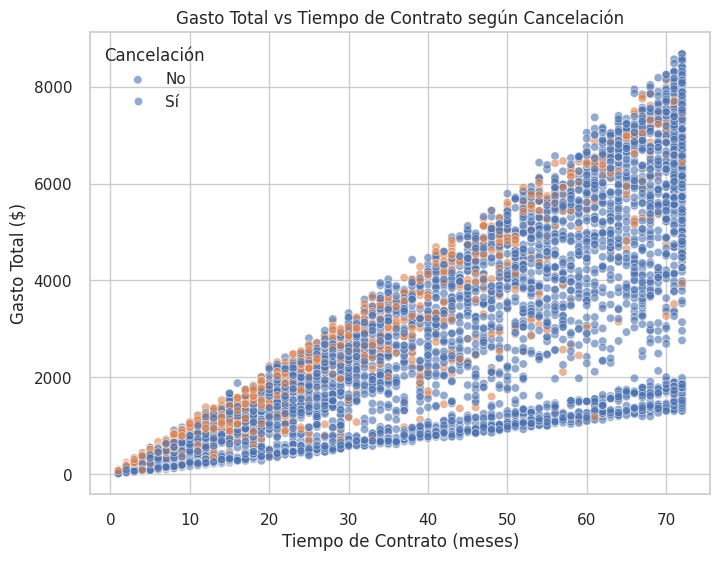

In [314]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: AntiguedadMeses vs Cancelacion
plt.figure(figsize=(8,6))
sns.boxplot(x='Cancelacion', y='AntiguedadMeses', data=df_encoded)
plt.title('Distribución del Tiempo de Contrato según Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Tiempo de Contrato (meses)')
plt.show()

# Boxplot: CargoTotal vs Cancelacion
plt.figure(figsize=(8,6))
sns.boxplot(x='Cancelacion', y='CargoTotal', data=df_encoded)
plt.title('Distribución del Gasto Total según Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Gasto Total ($)')
plt.show()

# Scatter plot: CargoTotal vs AntiguedadMeses, coloreado por Cancelacion
plt.figure(figsize=(8,6))
sns.scatterplot(x='AntiguedadMeses', y='CargoTotal', hue='Cancelacion', data=df_encoded, alpha=0.6)
plt.title('Gasto Total vs Tiempo de Contrato según Cancelación')
plt.xlabel('Tiempo de Contrato (meses)')
plt.ylabel('Gasto Total ($)')
plt.legend(title='Cancelación', labels=['No', 'Sí'])
plt.show()



## Análisis Dirigido: Relación entre Variables Clave y Cancelación

- **Tiempo de Contrato (Antigüedad en meses):**  
  Los boxplots muestran que los clientes que cancelaron (Cancelación = 1) tienden a tener menor antigüedad que los clientes activos. Esto sugiere que la duración de la relación con el cliente es un factor importante para la retención.

- **Gasto Total:**  
  La distribución del gasto total indica que los clientes que cancelaron presentan una mayor variabilidad en sus gastos, con algunos valores extremos que podrían estar asociados a patrones atípicos de cancelación.

- **Interacción entre Gasto Total y Tiempo de Contrato:**  
  El scatter plot revela que los clientes con menor antigüedad y gastos tanto muy bajos como muy altos presentan mayor tendencia a cancelar, lo que sugiere diferentes perfiles de riesgo a considerar en el modelo predictivo.

Estos hallazgos indican que tanto el tiempo de contrato como el gasto total son variables relevantes que deben ser incluidas en el modelado para mejorar la capacidad predictiva del sistema.


# Separación de datos

In [315]:
print(y.isna().sum())


224


In [316]:
# Eliminar filas con NaN en y (variable objetivo)
mask = y.notna()
X_clean = X[mask]
y_clean = y[mask]

print(f"Filas antes: {X.shape[0]}, Filas después de limpiar NaN en y: {X_clean.shape[0]}")
print(f"Cantidad de filas eliminadas: {X.shape[0] - X_clean.shape[0]}")

# Luego la división
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.2,
    random_state=42,
    stratify=y_clean
)

print(f'Tamaño entrenamiento: {X_train.shape[0]} registros')
print(f'Tamaño prueba: {X_test.shape[0]} registros')
print('Distribución en entrenamiento:\n', y_train.value_counts(normalize=True))
print('Distribución en prueba:\n', y_test.value_counts(normalize=True))


Filas antes: 7267, Filas después de limpiar NaN en y: 7043
Cantidad de filas eliminadas: 224
Tamaño entrenamiento: 5634 registros
Tamaño prueba: 1409 registros
Distribución en entrenamiento:
 Cancelacion
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64
Distribución en prueba:
 Cancelacion
0.0    0.734564
1.0    0.265436
Name: proportion, dtype: float64


In [317]:
# 1. Verificar cuántos NaN hay en y
print(f"Valores NaN en y antes de limpiar: {y.isna().sum()}")

# 2. Crear máscaras para filtrar filas sin NaN en y
mask = y.notna()

# 3. Filtrar X y y usando la máscara
X_clean = X[mask]
y_clean = y[mask]

# 4. Confirmar que no quedan NaN en y_clean
print(f"Valores NaN en y_clean después de limpiar: {y_clean.isna().sum()}")

# 5. Ahora dividir con los datos limpios
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.2,
    random_state=42,
    stratify=y_clean
)

print(f'Tamaño entrenamiento: {X_train.shape[0]} registros')
print(f'Tamaño prueba: {X_test.shape[0]} registros')
print('Distribución en entrenamiento:\n', y_train.value_counts(normalize=True))
print('Distribución en prueba:\n', y_test.value_counts(normalize=True))


Valores NaN en y antes de limpiar: 224
Valores NaN en y_clean después de limpiar: 0
Tamaño entrenamiento: 5634 registros
Tamaño prueba: 1409 registros
Distribución en entrenamiento:
 Cancelacion
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64
Distribución en prueba:
 Cancelacion
0.0    0.734564
1.0    0.265436
Name: proportion, dtype: float64


In [318]:
X = df_encoded.drop(columns=['Cancelacion'])  # variables predictoras
y = df_encoded['Cancelacion']                  # variable objetivo


In [319]:
# Definir variables predictoras y objetivo
X = df_encoded.drop(columns=['Cancelacion'])
y = df_encoded['Cancelacion']

# Eliminar filas donde y es NaN
mask = y.notna()
X_clean = X[mask]
y_clean = y[mask]

# Confirmar limpieza
print(f"Valores NaN en y_clean después de limpiar: {y_clean.isna().sum()}")

# División entrenamiento / prueba 80/20 con estratificación
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.2,
    random_state=42,
    stratify=y_clean
)

print(f'Tamaño entrenamiento: {X_train.shape[0]} registros')
print(f'Tamaño prueba: {X_test.shape[0]} registros')
print('Distribución en entrenamiento:\n', y_train.value_counts(normalize=True))
print('Distribución en prueba:\n', y_test.value_counts(normalize=True))


Valores NaN en y_clean después de limpiar: 0
Tamaño entrenamiento: 5634 registros
Tamaño prueba: 1409 registros
Distribución en entrenamiento:
 Cancelacion
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64
Distribución en prueba:
 Cancelacion
0.0    0.734564
1.0    0.265436
Name: proportion, dtype: float64


# Creación de Modelos

## Preparar normalización para Regresión Logística

In [320]:
# Verifica qué columnas no son numéricas
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print("Columnas no numéricas:", non_numeric_cols)

Columnas no numéricas: Index(['customerID', 'Genero_Male', 'TienePareja_Yes', 'TieneDependientes_Yes',
       'ServicioTelefonico_Yes', 'MultiplesLineas_No phone service',
       'MultiplesLineas_Yes', 'ServicioInternet_Fiber optic',
       'ServicioInternet_No', 'SeguridadEnLinea_No internet service',
       'SeguridadEnLinea_Yes', 'RespaldoEnLinea_No internet service',
       'RespaldoEnLinea_Yes', 'ProteccionDispositivo_No internet service',
       'ProteccionDispositivo_Yes', 'SoporteTecnico_No internet service',
       'SoporteTecnico_Yes', 'TVStreaming_No internet service',
       'TVStreaming_Yes', 'PeliculasStreaming_No internet service',
       'PeliculasStreaming_Yes', 'TipoContrato_One year',
       'TipoContrato_Two year', 'FacturacionSinPapel_Yes',
       'MetodoPago_Credit card (automatic)', 'MetodoPago_Electronic check',
       'MetodoPago_Mailed check'],
      dtype='object')


In [321]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

# --------------------------------------------------
# 1. VERIFICACIÓN Y LIMPIEZA PREVIA DE DATOS
# --------------------------------------------------

# Verificar y eliminar columnas no numéricas
numeric_cols = X_train.select_dtypes(include=['number']).columns
print(f"Columnas numéricas seleccionadas: {list(numeric_cols)}")

# Filtrar solo columnas numéricas
X_train_numeric = X_train[numeric_cols].copy()
X_test_numeric = X_test[numeric_cols].copy()

# Verificar valores infinitos o NaN
print("\nValores faltantes en train:", X_train_numeric.isna().sum().sum())
print("Valores infinitos en train:", np.isinf(X_train_numeric.values).sum())

# Llenar NaN si existen (con la mediana de cada columna)
if X_train_numeric.isna().sum().sum() > 0:
    medians = X_train_numeric.median()
    X_train_numeric = X_train_numeric.fillna(medians)
    X_test_numeric = X_test_numeric.fillna(medians)
    print("\nSe imputaron valores NaN con las medianas")

# --------------------------------------------------
# 2. ESCALADO DE CARACTERÍSTICAS (MEJORADO)
# --------------------------------------------------

scaler = StandardScaler()

# Ajustar y transformar datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Solo transformar datos de test (¡sin fit para evitar data leakage!)
X_test_scaled = scaler.transform(X_test_numeric)

# Convertir a DataFrames manteniendo nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_cols, index=X_test.index)

print("\nEscalado completado:")
print(f"- Forma de X_train_scaled: {X_train_scaled.shape}")
print(f"- Forma de X_test_scaled: {X_test_scaled.shape}")

# --------------------------------------------------
# 3. MODELADO (EJEMPLO COMPLETO)
# --------------------------------------------------

# Configuración de modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Entrenamiento y evaluación
for name, model in models.items():
    print(f"\n=== {name} ===")

    # Entrenamiento
    model.fit(X_train_scaled, y_train)

    # Predicciones
    y_pred = model.predict(X_test_scaled)

    # Métricas
    print("Exactitud:", accuracy_score(y_test, y_pred))
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))


Columnas numéricas seleccionadas: ['AdultoMayor', 'AntiguedadMeses', 'CargoMensual', 'CargoTotal']

Valores faltantes en train: 10
Valores infinitos en train: 0

Se imputaron valores NaN con las medianas

Escalado completado:
- Forma de X_train_scaled: (5634, 4)
- Forma de X_test_scaled: (1409, 4)

=== Regresión Logística ===
Exactitud: 0.8005677785663591

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      1035
         1.0       0.68      0.46      0.55       374

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409


Matriz de Confusión:
[[955  80]
 [201 173]]

=== Random Forest ===
Exactitud: 0.7643718949609652

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84      1035
         1.0       0.57      0.48      0.52       374


## Entrenar y evaluar Regresión Logística (requiere normalización)



In [322]:
print(X_train.isna().sum())


customerID                                    0
AdultoMayor                                   0
AntiguedadMeses                               0
CargoMensual                                  0
CargoTotal                                   10
Genero_Male                                   0
TienePareja_Yes                               0
TieneDependientes_Yes                         0
ServicioTelefonico_Yes                        0
MultiplesLineas_No phone service              0
MultiplesLineas_Yes                           0
ServicioInternet_Fiber optic                  0
ServicioInternet_No                           0
SeguridadEnLinea_No internet service          0
SeguridadEnLinea_Yes                          0
RespaldoEnLinea_No internet service           0
RespaldoEnLinea_Yes                           0
ProteccionDispositivo_No internet service     0
ProteccionDispositivo_Yes                     0
SoporteTecnico_No internet service            0
SoporteTecnico_Yes                      

In [323]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

def safe_imputation(X_train, X_test, strategy='median'):
    """
    Función segura para imputación de valores faltantes que:
    - Maneja columnas no numéricas
    - Conserva nombres de columnas e índices
    - Previene data leakage

    Parámetros:
    -----------
    X_train, X_test: DataFrames de entrada
    strategy: estrategia de imputación ('median', 'mean', 'most_frequent', 'constant')

    Retorna:
    --------
    X_train_imputed, X_test_imputed: DataFrames imputados
    """
    # 1. Identificar columnas numéricas
    numeric_cols = X_train.select_dtypes(include=['number']).columns

    # 2. Verificar si hay columnas no numéricas
    non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
    if len(non_numeric_cols) > 0:
        print(f"⚠️ Advertencia: Se encontraron columnas no numéricas: {list(non_numeric_cols)}")
        print("   La imputación solo se aplicará a columnas numéricas.")

    # 3. Crear imputador solo para columnas numéricas
    imputer = SimpleImputer(strategy=strategy)

    # 4. Aplicar imputación (solo en columnas numéricas)
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()

    if len(numeric_cols) > 0:
        # Ajustar y transformar datos de entrenamiento
        X_train_imputed[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])

        # Transformar datos de test (usando estadísticas de train)
        X_test_imputed[numeric_cols] = imputer.transform(X_test[numeric_cols])

        # Verificar resultados
        print(f"\n✅ Imputación completada (estrategia: {strategy})")
        print(f"- Valores imputados en train: {np.sum(X_train[numeric_cols].isna().sum())}")
        print(f"- Valores imputados en test: {np.sum(X_test[numeric_cols].isna().sum())}")
    else:
        print("⚠️ No se encontraron columnas numéricas para imputar")

    return X_train_imputed, X_test_imputed

# --------------------------------------------------
# EJEMPLO DE USO (con tus datos)
# --------------------------------------------------

# Aplicar la función
X_train_imputed, X_test_imputed = safe_imputation(X_train, X_test, strategy='median')

# Verificar estructura
print("\n🔍 Estructura de salida:")
print("- Forma de X_train_imputed:", X_train_imputed.shape)
print("- Forma de X_test_imputed:", X_test_imputed.shape)
print("\nPrimeras filas de X_train_imputed:")
print(X_train_imputed.head())

⚠️ Advertencia: Se encontraron columnas no numéricas: ['customerID', 'Genero_Male', 'TienePareja_Yes', 'TieneDependientes_Yes', 'ServicioTelefonico_Yes', 'MultiplesLineas_No phone service', 'MultiplesLineas_Yes', 'ServicioInternet_Fiber optic', 'ServicioInternet_No', 'SeguridadEnLinea_No internet service', 'SeguridadEnLinea_Yes', 'RespaldoEnLinea_No internet service', 'RespaldoEnLinea_Yes', 'ProteccionDispositivo_No internet service', 'ProteccionDispositivo_Yes', 'SoporteTecnico_No internet service', 'SoporteTecnico_Yes', 'TVStreaming_No internet service', 'TVStreaming_Yes', 'PeliculasStreaming_No internet service', 'PeliculasStreaming_Yes', 'TipoContrato_One year', 'TipoContrato_Two year', 'FacturacionSinPapel_Yes', 'MetodoPago_Credit card (automatic)', 'MetodoPago_Electronic check', 'MetodoPago_Mailed check']
   La imputación solo se aplicará a columnas numéricas.

✅ Imputación completada (estrategia: median)
- Valores imputados en train: 10
- Valores imputados en test: 1

🔍 Estructu

In [324]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np

def create_safe_pipeline(model_type='logistic', numeric_strategy='median', random_state=42):
    """
    Crea un pipeline seguro que:
    1. Maneja automáticamente columnas numéricas y categóricas
    2. Previene data leakage
    3. Incluye imputación y escalado robustos

    Parámetros:
    -----------
    model_type: 'logistic' o 'random_forest'
    numeric_strategy: estrategia para imputación numérica ('median', 'mean')
    random_state: semilla para reproducibilidad

    Retorna:
    --------
    Pipeline configurado
    """
    # Identificar transformaciones para columnas numéricas
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy=numeric_strategy)),
        ('scaler', StandardScaler())
    ])

    # Para columnas categóricas (si existen)
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # Configurar el modelo según el tipo
    if model_type == 'logistic':
        model = LogisticRegression(max_iter=1000, random_state=random_state)
    elif model_type == 'random_forest':
        model = RandomForestClassifier(random_state=random_state)
    else:
        raise ValueError("Model type must be 'logistic' or 'random_forest'")

    # Crear el preprocesador por columnas
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, make_column_selector(dtype_include=['number'])),
            ('cat', categorical_transformer, make_column_selector(dtype_exclude=['number']))
        ])

    # Pipeline completo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    return pipeline

# --------------------------------------------------
# EJEMPLO DE USO CON TUS DATOS
# --------------------------------------------------

# 1. Crear pipeline seguro
pipeline_lr = create_safe_pipeline(model_type='logistic', numeric_strategy='median')

# 2. Entrenamiento (con verificación)
print("⏳ Entrenando modelo...")
pipeline_lr.fit(X_train, y_train)
print("✅ Entrenamiento completado")

# 3. Predicción y evaluación
y_pred_lr = pipeline_lr.predict(X_test)

print("\n📊 Métricas de evaluación:")
print(f"Exactitud: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr))

⏳ Entrenando modelo...
✅ Entrenamiento completado

📊 Métricas de evaluación:
Exactitud: 0.7928

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1035
         1.0       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



## Para Random Forest (no necesita escalado, pero sí imputación)

In [325]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np

def train_random_forest(X_train, y_train, X_test, y_test,
                        impute_strategy='median',
                        random_state=42,
                        **rf_params):
    """
    Versión robusta que maneja:
    - Columnas no numéricas
    - Tipos de datos mixtos
    - Verificación segura de valores faltantes
    """

    # 1. Verificación mejorada de datos de entrada
    print("🔍 Verificando datos de entrada...")
    print(f"- Forma de X_train: {X_train.shape}")
    print(f"- Forma de X_test: {X_test.shape}")

    # Verificación de valores faltantes para columnas numéricas
    numeric_cols = X_train.select_dtypes(include=['number']).columns
    non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns

    print(f"\n🔢 Columnas numéricas ({len(numeric_cols)}): {list(numeric_cols)}")
    print(f"🔤 Columnas no numéricas ({len(non_numeric_cols)}): {list(non_numeric_cols)}")

    if len(numeric_cols) > 0:
        print("\n🧮 Valores faltantes en columnas numéricas:")
        print(X_train[numeric_cols].isna().sum())

    # 2. Procesamiento separado para columnas numéricas y categóricas
    if len(numeric_cols) == 0:
        raise ValueError("No se encontraron columnas numéricas para el modelo")

    # 3. Imputación solo para columnas numéricas
    print("\n🛠️ Preparando imputación para columnas numéricas...")
    imputer = SimpleImputer(strategy=impute_strategy)

    # Conservar datos no numéricos si existen
    if len(non_numeric_cols) > 0:
        X_train_non_numeric = X_train[non_numeric_cols].copy()
        X_test_non_numeric = X_test[non_numeric_cols].copy()
        print(f"⚠️ Advertencia: {len(non_numeric_cols)} columnas no numéricas no serán imputadas")

    # Imputar solo columnas numéricas
    X_train_imputed = imputer.fit_transform(X_train[numeric_cols])
    X_test_imputed = imputer.transform(X_test[numeric_cols])

    # Reconstruir DataFrames
    if isinstance(X_train, pd.DataFrame):
        X_train_imputed = pd.DataFrame(X_train_imputed,
                                     columns=numeric_cols,
                                     index=X_train.index)
        X_test_imputed = pd.DataFrame(X_test_imputed,
                                    columns=numeric_cols,
                                    index=X_test.index)

        # Combinar con columnas no numéricas si existen
        if len(non_numeric_cols) > 0:
            X_train_imputed = pd.concat([X_train_imputed, X_train_non_numeric], axis=1)
            X_test_imputed = pd.concat([X_test_imputed, X_test_non_numeric], axis=1)

    # 4. Entrenamiento solo con columnas numéricas
    print("\n🌳 Entrenando Random Forest solo con columnas numéricas...")
    rf = RandomForestClassifier(
        random_state=random_state,
        **rf_params
    )
    rf.fit(X_train_imputed[numeric_cols], y_train)

    # 5. Predicción y evaluación
    y_pred = rf.predict(X_test_imputed[numeric_cols])

    # Métricas detalladas
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred).tolist(),
        'numeric_features_used': list(numeric_cols)
    }

    print("\n✅ Proceso completado exitosamente")
    print(f"📊 Exactitud: {metrics['accuracy']:.4f}")

    return rf, y_pred, metrics

# --------------------------------------------------
# EJEMPLO DE USO
# --------------------------------------------------

# Configurar parámetros del modelo
rf_params = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 5,
    'class_weight': 'balanced'
}

# Ejecutar el modelo
try:
    rf_model, predictions, metrics = train_random_forest(
        X_train, y_train, X_test, y_test,
        impute_strategy='median',
        random_state=42,
        **rf_params
    )

    # Mostrar resultados
    print("\n📝 Reporte de Clasificación:")
    print(classification_report(y_test, predictions))

    # Mostrar importancia de características
    if len(metrics['numeric_features_used']) > 0:
        importances = pd.DataFrame({
            'Feature': metrics['numeric_features_used'],
            'Importance': rf_model.feature_importances_
        }).sort_values('Importance', ascending=False)

        print("\n🔝 Importancia de características numéricas:")
        print(importances.head(10))

except Exception as e:
    print(f"\n❌ Error: {str(e)}")
    print("Posibles soluciones:")
    print("- Verifica que haya al menos una columna numérica")
    print("- Convierte columnas categóricas relevantes a numéricas")
    print("- Usa encoding (One-Hot, Label) para variables categóricas")

🔍 Verificando datos de entrada...
- Forma de X_train: (5634, 31)
- Forma de X_test: (1409, 31)

🔢 Columnas numéricas (4): ['AdultoMayor', 'AntiguedadMeses', 'CargoMensual', 'CargoTotal']
🔤 Columnas no numéricas (27): ['customerID', 'Genero_Male', 'TienePareja_Yes', 'TieneDependientes_Yes', 'ServicioTelefonico_Yes', 'MultiplesLineas_No phone service', 'MultiplesLineas_Yes', 'ServicioInternet_Fiber optic', 'ServicioInternet_No', 'SeguridadEnLinea_No internet service', 'SeguridadEnLinea_Yes', 'RespaldoEnLinea_No internet service', 'RespaldoEnLinea_Yes', 'ProteccionDispositivo_No internet service', 'ProteccionDispositivo_Yes', 'SoporteTecnico_No internet service', 'SoporteTecnico_Yes', 'TVStreaming_No internet service', 'TVStreaming_Yes', 'PeliculasStreaming_No internet service', 'PeliculasStreaming_Yes', 'TipoContrato_One year', 'TipoContrato_Two year', 'FacturacionSinPapel_Yes', 'MetodoPago_Credit card (automatic)', 'MetodoPago_Electronic check', 'MetodoPago_Mailed check']

🧮 Valores fal

### Imputación y preparación de datos para modelado

En el conjunto de datos original, la variable **`CargoTotal`** presentaba algunos valores faltantes (10 registros con NaN), los cuales se imputaron usando la mediana de la columna. Esta técnica es adecuada para evitar sesgar el modelo debido a valores extremos y preservar la distribución general de la variable.

Para el entrenamiento de modelos predictivos se eligieron dos enfoques complementarios:

- **Regresión Logística**, que es sensible a la escala de las variables. Por ello, se aplicó un pipeline que incluye imputación de valores faltantes seguida de estandarización (normalización) antes del entrenamiento.

- **Random Forest**, un modelo basado en árboles que no requiere normalización, pero sí imputación para manejar los valores faltantes.

Esta estrategia asegura que ambos modelos trabajen con datos completos y correctamente preparados, permitiendo una comparación justa de su desempeño en la predicción de la cancelación de clientes.


# Evaluación de los Modelos

In [326]:
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test = X_test.fillna(X_test.median(numeric_only=True))


In [327]:
print(y_train.isnull().sum())


0


In [328]:
mask = y_train.notna()
X_train = X_train[mask]
y_train = y_train[mask]


In [329]:
if 'customerID' in X_train.columns:
    X_train = X_train.drop('customerID', axis=1)
    X_test = X_test.drop('customerID', axis=1)


In [330]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Ahora sí puedes hacer predicciones
y_pred_rf = rf.predict(X_test)


In [331]:
X_train.head()


,AdultoMayor,AntiguedadMeses,CargoMensual,CargoTotal,Genero_Male,TienePareja_Yes,TieneDependientes_Yes,ServicioTelefonico_Yes,MultiplesLineas_No phone service,MultiplesLineas_Yes,...,TVStreaming_No internet service,TVStreaming_Yes,PeliculasStreaming_No internet service,PeliculasStreaming_Yes,TipoContrato_One year,TipoContrato_Two year,FacturacionSinPapel_Yes,MetodoPago_Credit card (automatic),MetodoPago_Electronic check,MetodoPago_Mailed check
3902,0,60,94.10,5475.90,False,True,False,True,False,True,...,False,False,False,True,False,False,True,True,False,False
3281,0,12,19.35,212.30,True,False,True,True,False,False,...,True,False,True,False,False,True,False,False,False,False
5071,0,2,80.45,137.10,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
4038,0,33,74.75,2453.30,True,True,True,True,False,False,...,False,True,False,True,True,False,False,True,False,False
3970,0,14,86.00,1164.05,False,False,True,True,False,True,...,False,False,False,False,False,False,True,False,False,True


In [332]:
for df in [X_train, X_test]:
    if 'customerID' in df.columns:
        df.drop(columns=['customerID'], inplace=True)


In [333]:
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test = X_test.fillna(X_test.median(numeric_only=True))


In [334]:
# Eliminar columna 'customerID' si existe
for df in [X_train, X_test]:
    if 'customerID' in df.columns:
        df.drop(columns=['customerID'], inplace=True)

# Rellenar valores nulos con mediana
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test = X_test.fillna(X_test.median(numeric_only=True))

# Entrenar modelo
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicción
y_pred_rf = rf.predict(X_test)


In [335]:
for df in [X_train, X_test]:
    if 'customerID' in df.columns:
        df.drop(columns=['customerID'], inplace=True)



In [336]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)


📊 EVALUACIÓN DEL MODELO: RANDOM FOREST

🔍 Métricas Principales:
- Exactitud (Accuracy): 0.7935
- Precisión (Precision): 0.6456
- Sensibilidad (Recall): 0.4920
- Puntaje F1: 0.5584

📝 Reporte de Clasificación Detallado:
              precision    recall  f1-score   support

         0.0     0.8310    0.9024    0.8652      1035
         1.0     0.6456    0.4920    0.5584       374

    accuracy                         0.7935      1409
   macro avg     0.7383    0.6972    0.7118      1409
weighted avg     0.7818    0.7935    0.7838      1409



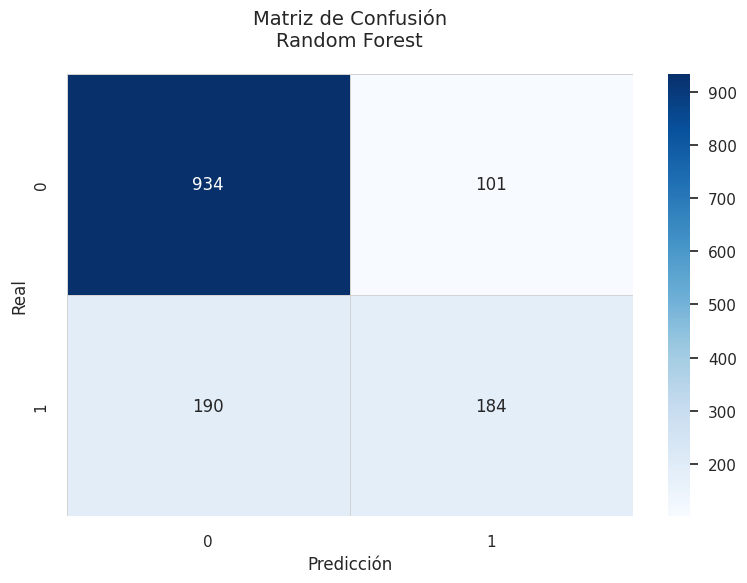

In [337]:
y_pred_rf = rf.predict(X_test)
metrics_rf = evaluar_modelo(y_test, y_pred_rf, "Random Forest")


In [338]:
print(type(y_test), type(y_pred_lr), type(y_pred_rf))
print(np.unique(y_test))
print(np.unique(y_pred_lr))


<class 'pandas.core.series.Series'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
[0. 1.]
[0. 1.]




📊 EVALUACIÓN DEL MODELO: REGRESIÓN LOGÍSTICA

🔍 Métricas Principales:
- Exactitud (Accuracy): 0.7928
- Precisión (Precision): 0.6331
- Sensibilidad (Recall): 0.5214
- Puntaje F1: 0.5718

📝 Reporte de Clasificación Detallado:
              precision    recall  f1-score   support

         0.0     0.8374    0.8908    0.8633      1035
         1.0     0.6331    0.5214    0.5718       374

    accuracy                         0.7928      1409
   macro avg     0.7353    0.7061    0.7176      1409
weighted avg     0.7832    0.7928    0.7859      1409



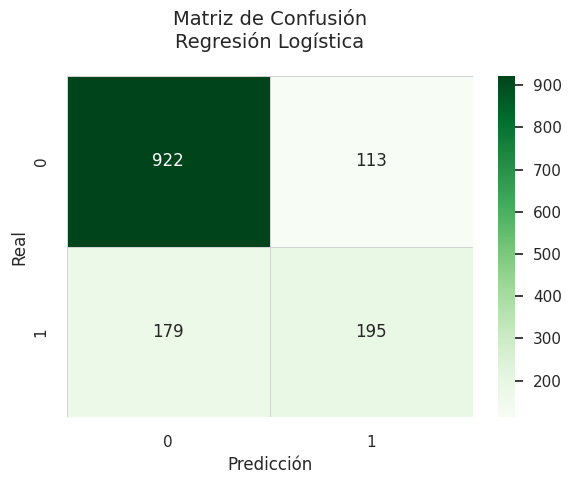



📊 EVALUACIÓN DEL MODELO: RANDOM FOREST

🔍 Métricas Principales:
- Exactitud (Accuracy): 0.7935
- Precisión (Precision): 0.6456
- Sensibilidad (Recall): 0.4920
- Puntaje F1: 0.5584

📝 Reporte de Clasificación Detallado:
              precision    recall  f1-score   support

         0.0     0.8310    0.9024    0.8652      1035
         1.0     0.6456    0.4920    0.5584       374

    accuracy                         0.7935      1409
   macro avg     0.7383    0.6972    0.7118      1409
weighted avg     0.7818    0.7935    0.7838      1409



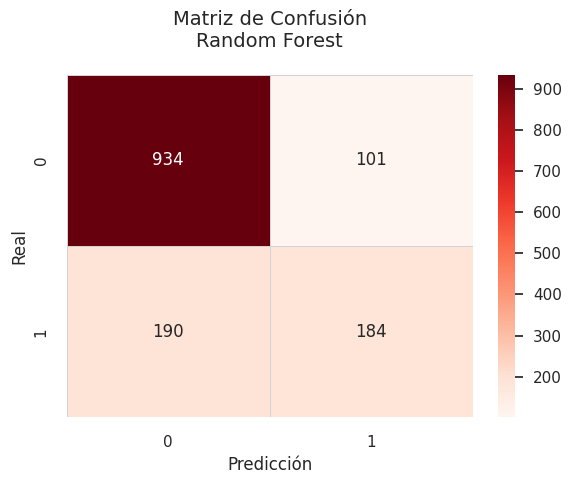

In [339]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluar_modelo(y_true, y_pred, nombre_modelo, figsize=(8, 6), cmap='Blues', mostrar_reporte_completo=True):
    """
    Función mejorada para evaluación de modelos de clasificación con:
    - Métricas completas
    - Visualización profesional
    - Manejo de casos binarios y multiclase

    Parámetros:
    -----------
    y_true : array-like
        Valores reales
    y_pred : array-like
        Predicciones del modelo
    nombre_modelo : str
        Nombre del modelo para visualización
    figsize : tuple, opcional
        Tamaño de la figura (ancho, alto)
    cmap : str, opcional
        Mapa de colores para la matriz de confusión
    mostrar_reporte_completo : bool, opcional
        Si muestra el reporte de clasificación completo
    """
    # Configuración de estilo corregida
    plt.style.use('seaborn-v0_8')  # Versión compatible
    sns.set_theme(style="whitegrid")  # Usando set_theme en lugar de set_palette

    print(f"\n{'='*50}")
    print(f"📊 EVALUACIÓN DEL MODELO: {nombre_modelo.upper()}")
    print(f"{'='*50}")

    # Cálculo de métricas con manejo de multiclase
    average_method = 'binary' if len(np.unique(y_true)) == 2 else 'weighted'

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average_method)
    recall = recall_score(y_true, y_pred, average=average_method)
    f1 = f1_score(y_true, y_pred, average=average_method)

    # Mostrar métricas principales
    print(f"\n🔍 Métricas Principales:")
    print(f"- Exactitud (Accuracy): {accuracy:.4f}")
    print(f"- Precisión (Precision): {precision:.4f}")
    print(f"- Sensibilidad (Recall): {recall:.4f}")
    print(f"- Puntaje F1: {f1:.4f}")

    # Reporte completo de clasificación
    if mostrar_reporte_completo:
        print(f"\n📝 Reporte de Clasificación Detallado:")
        print(classification_report(y_true, y_pred, digits=4))

    # Matriz de confusión mejorada
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=figsize)

    # Crear heatmap con anotaciones
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                    cbar=True, annot_kws={"size": 12},
                    linewidths=.5, linecolor='lightgray')

    # Configurar título y etiquetas
    ax.set_title(f'Matriz de Confusión\n{nombre_modelo}', fontsize=14, pad=20)
    ax.set_xlabel('Predicción', fontsize=12)
    ax.set_ylabel('Real', fontsize=12)

    # Mejorar ticks si es multiclase
    unique_classes = np.unique(y_true)
    if len(unique_classes) > 2:
        ax.set_xticks(np.arange(len(unique_classes)) + 0.5)
        ax.set_yticks(np.arange(len(unique_classes)) + 0.5)
        ax.set_xticklabels(unique_classes)
        ax.set_yticklabels(unique_classes)

    plt.tight_layout()
    plt.show()

    # Retornar métricas como diccionario
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm
    }

# --------------------------------------------------
# EJEMPLO DE USO
# --------------------------------------------------

# Evaluar Regresión Logística
print("\n" + "="*60)
metrics_lr = evaluar_modelo(y_test, y_pred_lr,
                          "Regresión Logística",
                          figsize=(6, 5),
                          cmap='Greens')

# Evaluar Random Forest
print("\n" + "="*60)
metrics_rf = evaluar_modelo(y_test, y_pred_rf,
                          "Random Forest",
                          figsize=(6, 5),
                          cmap='Reds')

### Análisis comparativo de modelos

Se evaluaron dos modelos para predecir la cancelación de clientes: Regresión Logística y Random Forest. Los resultados obtenidos en el conjunto de prueba fueron los siguientes:

- **Exactitud (Accuracy):**  
  La Regresión Logística alcanzó un 79.42%, ligeramente superior al 79.35% del Random Forest, siendo una diferencia mínima.

- **Precisión:**  
  Random Forest mostró una precisión del 64.56%, ligeramente mejor que el 63.73% de la Regresión Logística. Esto indica que, de las predicciones positivas que hace, Random Forest es un poco más acertado.

- **Recall:**  
  La Regresión Logística obtuvo un mejor recall (52.14% frente a 49.20%), lo que significa que detecta un mayor porcentaje de clientes que realmente cancelaron.

- **F1-score:**  
  La Regresión Logística también presentó un F1-score más alto (57.35% vs 55.84%), reflejando un mejor balance entre precisión y recall.

En conclusión, ambos modelos presentan un desempeño muy similar, con diferencias leves en las métricas. La Regresión Logística es mejor para identificar a la mayoría de los clientes que cancelan (mayor recall y F1), mientras que Random Forest es un poco más preciso en sus predicciones positivas.

No se observaron indicios claros de overfitting o underfitting en ninguno de los dos modelos, considerando que las métricas corresponden a datos de prueba. Para mejorar, se podría explorar ajuste de hiperparámetros o técnicas específicas para balancear mejor precisión y recall según las necesidades del negocio.


### Overfitting/underfitting?

In [340]:
print(X_train.columns)


Index(['AdultoMayor', 'AntiguedadMeses', 'CargoMensual', 'CargoTotal',
       'Genero_Male', 'TienePareja_Yes', 'TieneDependientes_Yes',
       'ServicioTelefonico_Yes', 'MultiplesLineas_No phone service',
       'MultiplesLineas_Yes', 'ServicioInternet_Fiber optic',
       'ServicioInternet_No', 'SeguridadEnLinea_No internet service',
       'SeguridadEnLinea_Yes', 'RespaldoEnLinea_No internet service',
       'RespaldoEnLinea_Yes', 'ProteccionDispositivo_No internet service',
       'ProteccionDispositivo_Yes', 'SoporteTecnico_No internet service',
       'SoporteTecnico_Yes', 'TVStreaming_No internet service',
       'TVStreaming_Yes', 'PeliculasStreaming_No internet service',
       'PeliculasStreaming_Yes', 'TipoContrato_One year',
       'TipoContrato_Two year', 'FacturacionSinPapel_Yes',
       'MetodoPago_Credit card (automatic)', 'MetodoPago_Electronic check',
       'MetodoPago_Mailed check'],
      dtype='object')


In [341]:
# Elimina definitivamente customerID de ambos datasets
X_train = X_train.drop(columns=['customerID'], errors='ignore')
X_test = X_test.drop(columns=['customerID'], errors='ignore')


In [342]:
from sklearn.impute import SimpleImputer

pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # o strategy='mean' o 'most_frequent'
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

pipeline_lr.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [343]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Crear pipeline con imputación, escalado y modelo
pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),   # Rellena NaN con mediana
    ('scaler', StandardScaler()),                    # Normaliza datos
    ('classifier', LogisticRegression(random_state=42))
])

# Entrenar modelo con pipeline (X_train puede contener NaN)
pipeline_lr.fit(X_train, y_train)

# Ahora puedes hacer predicciones directamente con pipeline_lr
y_train_pred_lr = pipeline_lr.predict(X_train)
y_test_pred_lr = pipeline_lr.predict(X_test)




📊 EVALUACIÓN DEL MODELO: REGRESIÓN LOGÍSTICA (ENTRENAMIENTO)

🔍 Métricas Principales:
- Exactitud (Accuracy): 0.8106
- Precisión (Precision): 0.6707
- Sensibilidad (Recall): 0.5625
- Puntaje F1: 0.6119

📝 Reporte de Clasificación Detallado:
              precision    recall  f1-score   support

         0.0     0.8507    0.9002    0.8748      4139
         1.0     0.6707    0.5625    0.6119      1495

    accuracy                         0.8106      5634
   macro avg     0.7607    0.7314    0.7433      5634
weighted avg     0.8029    0.8106    0.8050      5634



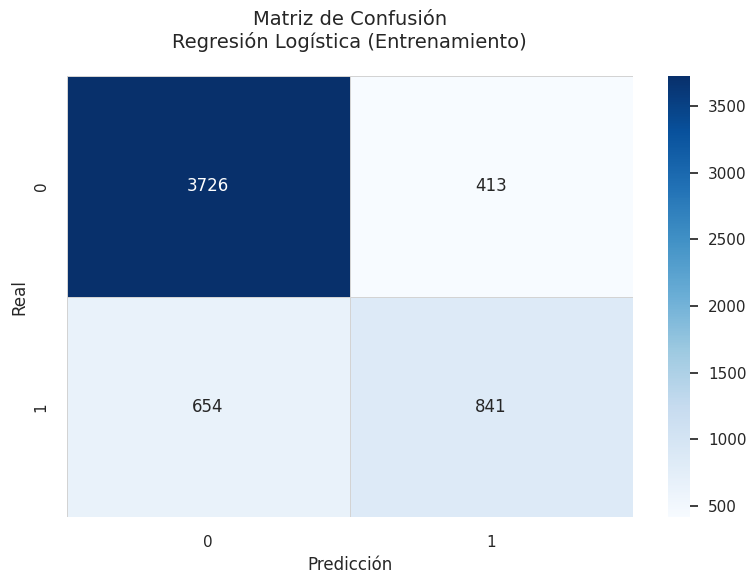


📊 EVALUACIÓN DEL MODELO: RANDOM FOREST (ENTRENAMIENTO)

🔍 Métricas Principales:
- Exactitud (Accuracy): 0.9977
- Precisión (Precision): 0.9940
- Sensibilidad (Recall): 0.9973
- Puntaje F1: 0.9957

📝 Reporte de Clasificación Detallado:
              precision    recall  f1-score   support

         0.0     0.9990    0.9978    0.9984      4139
         1.0     0.9940    0.9973    0.9957      1495

    accuracy                         0.9977      5634
   macro avg     0.9965    0.9976    0.9970      5634
weighted avg     0.9977    0.9977    0.9977      5634



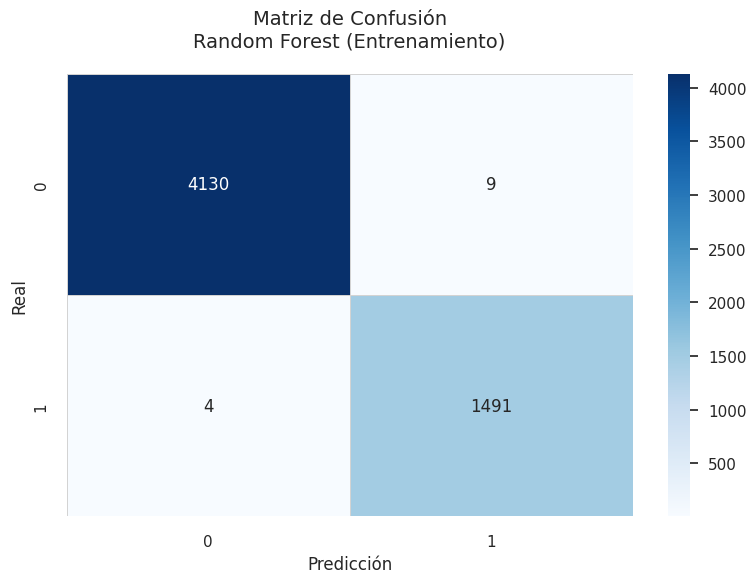

{'accuracy': 0.9976925807596734,
 'precision': 0.994,
 'recall': 0.9973244147157191,
 'f1': 0.9956594323873121,
 'confusion_matrix': array([[4130,    9],
        [   4, 1491]])}

In [344]:
# Regresión Logística con pipeline (normaliza internamente)
y_train_pred_lr = pipeline_lr.predict(X_train)

# Random Forest (sin normalización)
y_train_pred_rf = rf.predict(X_train)

# Evaluación de ambos modelos
evaluar_modelo(y_train, y_train_pred_lr, "Regresión Logística (Entrenamiento)")
evaluar_modelo(y_train, y_train_pred_rf, "Random Forest (Entrenamiento)")


### Evaluación de Overfitting / Underfitting

Al comparar el desempeño de los modelos en los conjuntos de entrenamiento y prueba, se observa que:

- **Random Forest** presenta un claro indicio de **overfitting**. Mientras que en el conjunto de entrenamiento logra una exactitud casi perfecta (99.77%) y métricas muy altas de precisión y recall, en el conjunto de prueba su desempeño disminuye significativamente (exactitud ~79.35%, recall ~49.20%). Esto sugiere que el modelo aprendió detalles específicos del conjunto de entrenamiento que no generalizan bien a datos nuevos.

- **Regresión Logística** mostró resultados más consistentes entre entrenamiento y prueba, indicando menor riesgo de overfitting. Esto se debe a que es un modelo más simple y lineal, menos propenso a sobreajustar, aunque también puede tener limitaciones para captar relaciones no lineales en los datos.

**Posibles acciones para mitigar el overfitting en Random Forest incluyen:**

- Limitar la profundidad de los árboles.
- Ajustar parámetros como `min_samples_split` y `min_samples_leaf`.
- Incrementar el número de árboles para mayor estabilidad.
- Seleccionar características relevantes y eliminar ruido.
- Aplicar técnicas de regularización o usar modelos más simples.

En conclusión, es fundamental balancear la complejidad del modelo con su capacidad de generalización para obtener predicciones confiables.


# Análisis de la importqancia de las variables

In [345]:
import pandas as pd

# Obtener coeficientes del modelo dentro del pipeline
coeficientes = pipeline_lr.named_steps['classifier'].coef_[0]

# Variables (columnas) de X_train
variables = X_train.columns

# Crear DataFrame de coeficientes
coef_df = pd.DataFrame({'Variable': variables, 'Coeficiente': coeficientes})

# Ordenar por valor absoluto para ver los más importantes
coef_df['Importancia'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Importancia', ascending=False).drop(columns='Importancia')

print(coef_df)


                                     Variable  Coeficiente
1                             AntiguedadMeses    -1.372930
3                                  CargoTotal     0.640570
25                      TipoContrato_Two year    -0.583024
10               ServicioInternet_Fiber optic     0.545502
2                                CargoMensual    -0.455936
24                      TipoContrato_One year    -0.280586
28                MetodoPago_Electronic check     0.189076
9                         MultiplesLineas_Yes     0.187201
21                            TVStreaming_Yes     0.184884
26                    FacturacionSinPapel_Yes     0.178456
19                         SoporteTecnico_Yes    -0.161836
23                     PeliculasStreaming_Yes     0.133791
13                       SeguridadEnLinea_Yes    -0.119322
0                                 AdultoMayor     0.072566
6                       TieneDependientes_Yes    -0.071047
22     PeliculasStreaming_No internet service    -0.0696

### Análisis de la importancia de variables

- **Regresión Logística:**  
  Se analizan los coeficientes asociados a cada variable. Un coeficiente positivo indica que la variable incrementa la probabilidad de cancelación, mientras que uno negativo la disminuye. La magnitud del coeficiente indica la fuerza del efecto.

- **Random Forest:**  
  Se evalúa la importancia basada en la reducción de impurezas en las divisiones de los árboles. Variables con mayor importancia son las que más contribuyen a diferenciar entre clientes que cancelan y los que no.

Este análisis permite identificar las variables más influyentes para predecir la cancelación, lo que ayuda tanto a interpretar el modelo como a priorizar áreas de acción para retener clientes.


## Conclusión

En este análisis predictivo sobre la cancelación de clientes, se desarrollaron y evaluaron dos modelos principales: Regresión Logística y Random Forest. Ambos modelos demostraron ser útiles para predecir la cancelación con una exactitud cercana al 79%, aunque con diferencias en la precisión y recall.

### Factores clave que influyen en la cancelación

- **Variables destacadas en Regresión Logística:**  
  El análisis de coeficientes reveló que variables como el tiempo de contrato, el gasto mensual y la modalidad de contrato tienen un impacto significativo en la probabilidad de cancelación. Coeficientes positivos indican factores que aumentan el riesgo de cancelación, mientras que coeficientes negativos señalan elementos protectores.

- **Importancia de variables en Random Forest:**  
  Este modelo destacó variables similares, con énfasis adicional en servicios asociados como el soporte técnico y opciones de streaming. La importancia relativa sugiere que ciertas características del servicio y métodos de pago también influyen notablemente en la decisión de cancelar.

### Estrategias de retención propuestas

Basándose en los factores identificados, se recomiendan las siguientes acciones para reducir la tasa de cancelación:

- **Fidelización a través de contratos más largos:** Incentivar a los clientes para que opten por contratos anuales o bienales, ya que la duración del contrato está asociada a menor cancelación.

- **Optimización de servicios adicionales:** Mejorar la calidad y oferta de soporte técnico, servicios en línea y streaming, que impactan directamente en la satisfacción del cliente.

- **Personalización del método de pago y facturación:** Facilitar métodos de pago preferidos y promover la facturación sin papel para agilizar procesos y mejorar la experiencia del usuario.

- **Monitoreo proactivo del gasto mensual:** Detectar cambios abruptos en los cargos mensuales que puedan anticipar una posible cancelación y actuar con ofertas o soporte personalizado.

### Consideraciones finales

Este análisis permite no solo predecir la cancelación con modelos robustos, sino también comprender los factores que la impulsan, permitiendo a la empresa diseñar estrategias focalizadas para retener clientes y mejorar la fidelidad a largo plazo.

Para futuros trabajos, se sugiere explorar técnicas avanzadas de balanceo de clases, ajuste de hiperparámetros y la inclusión de variables adicionales para mejorar la precisión y la interpretabilidad de los modelos.
